# Assignmnet 7
## Write a function that takes as input the following:

- another function (note that in Python you can pass functions as arguments to other functions)
- starting point
- temperature 
- learning/decay rate

So, for this part of the assignmnet we try to define a generator function called `simulated_annealing` that inputs all the values as mentioned in the problem statement and returns with the values best, beat_cost. We first define any function and name current_cost as its valus at the start. We run a while loop for Temp greater than the tollerance value that we have defined. `next_point` is the randon point generated closer to the current point and we check if the value of this generated point is lesser than the previous one. If yes, it becomes the new current_cost. If this current cost is the best minima we have come across, best_cost is also updated. We use yeild here instead of return, to return the best point found so far and the sequence of points visited by the algorithm, without having to store them in memory. As the algorithm can potentially visit a large number of points, storing them all in memory can be very memory-intensive.

In [1]:
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

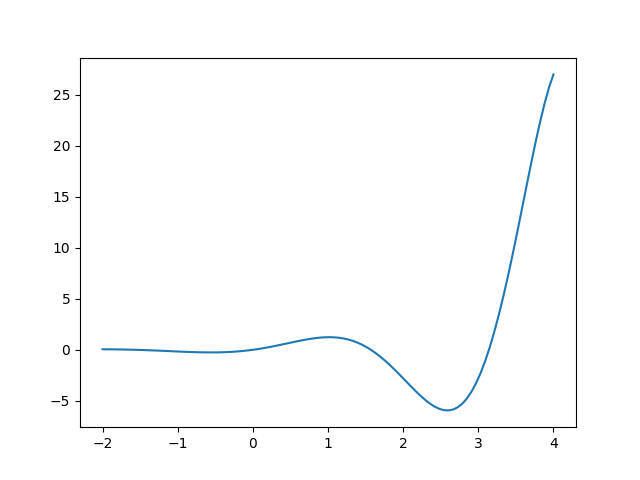

In [5]:
def yfunc(x):
    return (np.e**x)*(np.cos(x))*(np.sin(x))

xbase = np.linspace(-2, 4, 100)
ybase = yfunc(xbase)


start = 3.45
temp = 3.0
decayrate = 0.99

fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro',markersize=4)
lngood, = ax.plot([], [], 'go', markersize=10)

def simulated_annealing(func, start, temp, decay, tol=1e-8):
    current = start
    current_cost = func(current)
    best = current
    best_cost = current_cost
    T = temp
    while T > tol:
        next = current + (np.random.random_sample() - 0.5) * T
        next_cost = func(next)
        delta = next_cost - current_cost
        if delta < 0 or np.random.random_sample() < np.exp(-delta / T):
            current = next
            current_cost = next_cost
        if current_cost < best_cost:
            best = current
            best_cost = current_cost
        T *= decay
        yield (best, best_cost)

We FuncAnimate all the points acquired from the generative funtion

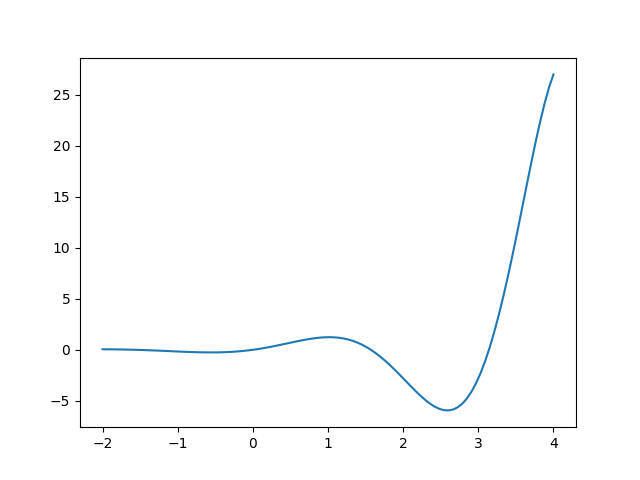

In [6]:
def onestep(frame):
    global xall, yall, lngood
    try:
        best, best_cost = next(sa)
        x, y = best, best_cost
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
        lngood.set_data(x, y)
    except StopIteration:
        pass
    return lnall, lngood


sa = simulated_annealing(yfunc, start, temp, decayrate)


ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
plt.show()

## The Traveling Salesman problem 
The traveling salesman problem gives you a set of city locations (x, y coordinates).  Your goal is to find a route from a given starting point that visits all the cities exactly once and then returns to the origin, with the minimum total distance covered (distance is measured as Euclidean distance $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$).  

Now we can explore different methods to attain the shortest distance, few of them are 
- Brute force
- Dynamic programming
- Simulated annealing
- Nearest Neighbour

We conclude that Brute fore can work best for a maximum of 20 cities, otherwise it's not computationally advisable. Simulated Annealing also could be implemented except for this particular dataset, Nearest Neighbor seems to be giving the best shortest distance at very less computational time. So, we have tried implementing `Nearest Neighbour` method to find the shortest distance. 

We first read the file and store the coordinates of the cities. And define a function called distance, that returns the distance between any two given points. We start at every point in the list of cities, and everytime we move to the next nearest node, we remove it from the unvisited_cities list. And we claculate the distance of the order. By doing the same for every start point and find the shortest distance.

### For 10 cities

Shortest tour: [0, 5, 4, 3, 1, 7, 9, 8, 2, 6, 0]
Shortest distance: 34.43384302733041


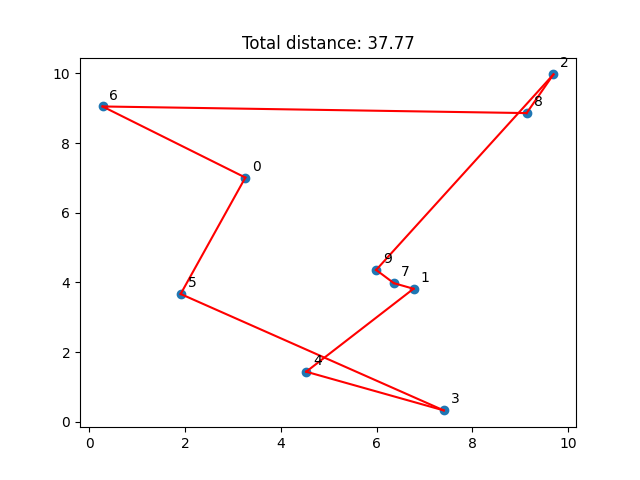

In [2]:
with open('tsp_10.txt') as f:
    n = int(f.readline().strip())
    cities = []
    for i in range(n):
        x, y = map(float, f.readline().strip().split())
        cities.append((x, y))

def distance(city1, city2):
    return np.sqrt((city1[0]-city2[0])**2 + (city1[1]-city2[1])**2)

shortest_tour = None
shortest_distance = float('inf')

for start_city in range(n):
    tour = [start_city]
    unvisited_cities = set(range(n))
    unvisited_cities.remove(start_city)
    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distance(cities[tour[-1]], cities[city]))
        tour.append(nearest_city)
        unvisited_cities.remove(nearest_city)
    tour.append(start_city) 
    total_distance = sum(distance(cities[tour[i]], cities[tour[i+1]]) for i in range(n))
    if total_distance < shortest_distance:
        shortest_tour = tour
        shortest_distance = total_distance

print("Shortest tour:", shortest_tour)
print("Shortest distance:", shortest_distance)

plt.scatter(*zip(*cities)) # plotting the cities
for i in range(n):
    plt.annotate(str(i), xy=cities[i], xytext=(5, 5), textcoords='offset points')
for i in range(n+1):
    plt.plot([cities[tour[i-1]][0], cities[tour[i]][0]], [cities[tour[i-1]][1], cities[tour[i]][1]], color='red')
plt.title(f'Total distance: {total_distance:.2f}')
plt.show()


### For 100 cities

Shortest tour: [26, 8, 23, 13, 49, 48, 75, 58, 46, 82, 98, 62, 33, 32, 79, 70, 1, 81, 44, 37, 11, 9, 66, 20, 83, 91, 28, 64, 96, 73, 90, 71, 59, 29, 53, 97, 31, 55, 3, 54, 21, 22, 36, 80, 18, 99, 7, 27, 14, 93, 65, 52, 39, 15, 50, 42, 84, 12, 57, 38, 63, 95, 0, 34, 61, 60, 24, 94, 40, 74, 92, 87, 45, 47, 68, 51, 56, 72, 19, 30, 25, 86, 6, 76, 16, 88, 17, 41, 4, 89, 2, 5, 78, 67, 35, 77, 69, 43, 10, 85, 26]
Shortest distance: 84.18065200060198


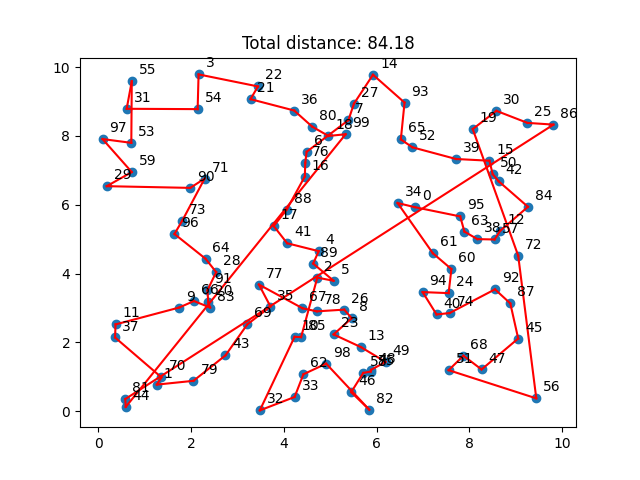

In [2]:
with open('tsp_100.txt') as f:
    n = int(f.readline().strip())
    cities = []
    for i in range(n):
        x, y = map(float, f.readline().strip().split())
        cities.append((x, y))

def distance(city1, city2):
    return np.sqrt((city1[0]-city2[0])**2 + (city1[1]-city2[1])**2)

shortest_tour = None
shortest_distance = float('inf')

for start_city in range(n):
    tour = [start_city]
    unvisited_cities = set(range(n))
    unvisited_cities.remove(start_city)
    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distance(cities[tour[-1]], cities[city]))
        tour.append(nearest_city)
        unvisited_cities.remove(nearest_city)
    tour.append(start_city)
    total_distance = sum(distance(cities[tour[i]], cities[tour[i+1]]) for i in range(n))

    if total_distance < shortest_distance:
        shortest_tour = tour
        shortest_distance = total_distance

print("Shortest tour:", shortest_tour)
print("Shortest distance:", shortest_distance)

plt.scatter(*zip(*cities))
for i in range(n):
    plt.annotate(str(i), xy=cities[i], xytext=(5, 5), textcoords='offset points')
for i in range(n+1):
    plt.plot([cities[tour[i-1]][0], cities[tour[i]][0]], [cities[tour[i-1]][1], cities[tour[i]][1]], color='red')
plt.title(f'Total distance: {shortest_distance:.2f}')
plt.show()